In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data = data.rename({'R&D Spend':'RandD_Spend','Marketing Spend':'Marketing_Spend'},axis=1)

In [6]:
data.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
data.corr()

,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


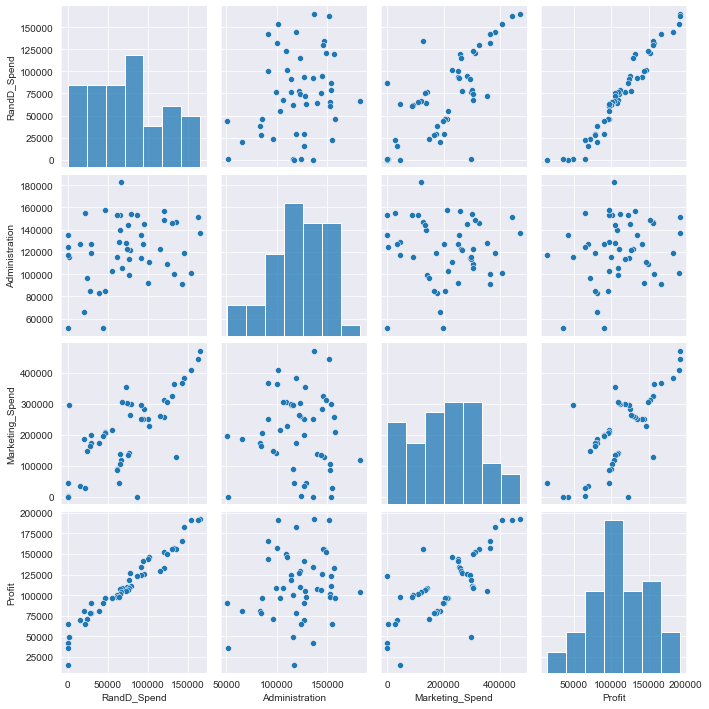

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Creating model 

In [9]:
model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data=data).fit()

In [10]:
model.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        19:25:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Since we are having P values above 0.05 for Administration and Marketing Spend, we are checking seperately 

In [13]:
model_a = smf.ols('Profit~Administration',data=data).fit()

In [14]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 17 Oct 2022   Prob (F-statistic):              0.162
Time:                        19:28:25   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# still we are having p value higher than 0.05 for Adminstration. so, It is not needed

In [15]:
model_m = smf.ols('Profit~Marketing_Spend', data=data).fit()

In [16]:
model_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           4.38e-10
Time:                        19:28:39   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Here the p value is extremely low, H0 is accepted. so, It is needed

In [18]:
model_am = smf.ols('Profit~Marketing_Spend+Administration',data=data).fit()

In [19]:
model_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           2.50e-10
Time:                        19:31:23   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# But we checking with both, then we got p values low. so, we use both

# calculating VIF

In [21]:
rsq_rnd = smf.ols("RandD_Spend~Administration+Marketing_Spend+Profit",data=data).fit().rsquared
vif_rnd = 1/(1-rsq_rnd)
rsq_admin = smf.ols('Administration~RandD_Spend+Marketing_Spend+Profit',data=data).fit().rsquared
vif_admin = 1/(1-rsq_admin)
rsq_market = smf.ols('Marketing_Spend~RandD_Spend+Administration+Profit',data=data).fit().rsquared
vif_market = 1-(1-rsq_market)
rsq_profit = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data=data).fit().rsquared
vif_profit = 1/(1-rsq_profit)

In [22]:
# sorting vif values in data frame
dvif = {'variables':['RandD_Spend','Administration','Marketing_Spend','Profit'], 'VIF': [vif_rnd,vif_admin,vif_market,vif_profit]}

In [23]:
vif_dframe = pd.DataFrame(dvif)

In [24]:
vif_dframe

,variables,VIF
0,RandD_Spend,19.563001
1,Administration,1.182146
2,Marketing_Spend,0.594375
3,Profit,20.302917


# Residual Analysis

# Test for Normality of Residuals( Q-Q Plot)

In [26]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [27]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


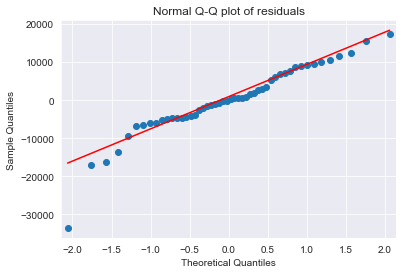

In [28]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

# Residual Plot for Homoscedasticity

In [30]:
def get_Standardized_values(vals):
    return(vals- vals.mean())/ vals.std()

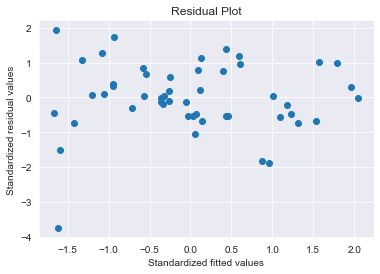

In [31]:
plt.scatter(get_Standardized_values(model.fittedvalues),get_Standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Since the plot is showing that data is scattered and have no relation

# Residuals vs Regressors

eval_env: 1


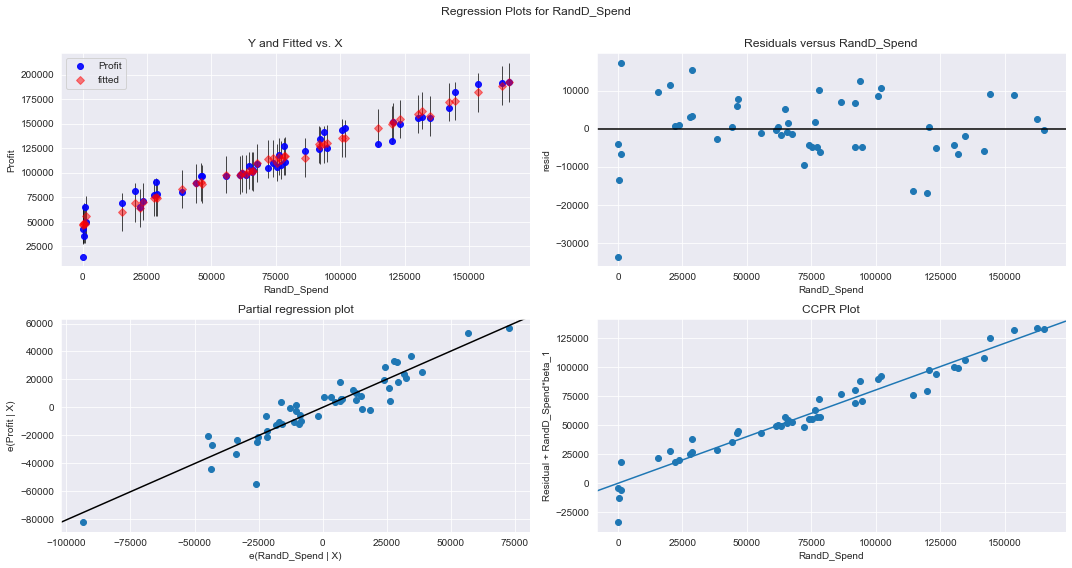

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'RandD_Spend',fig=fig)
plt.show()

# This is positively correlative

eval_env: 1


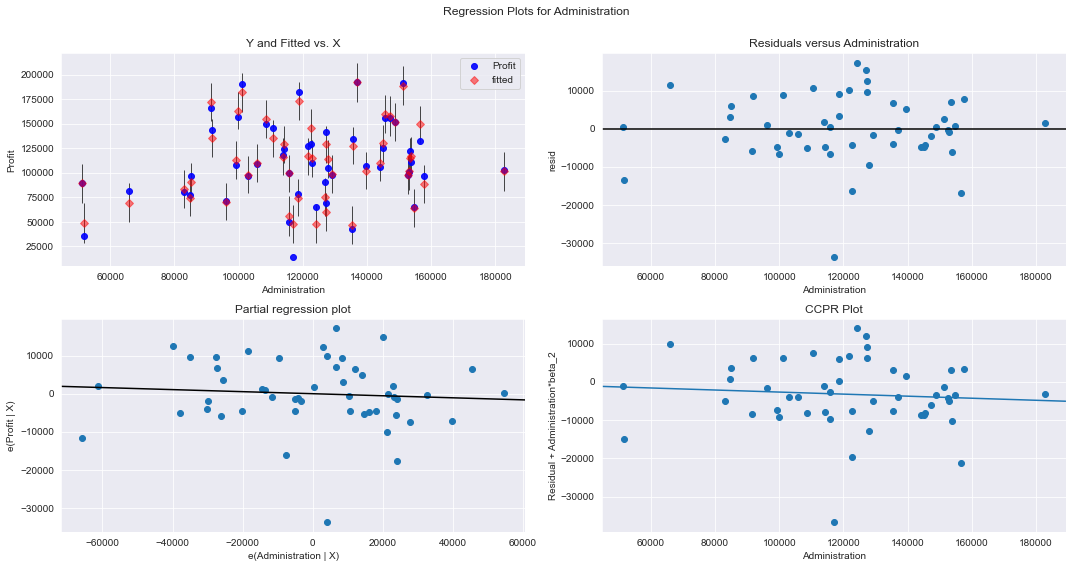

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


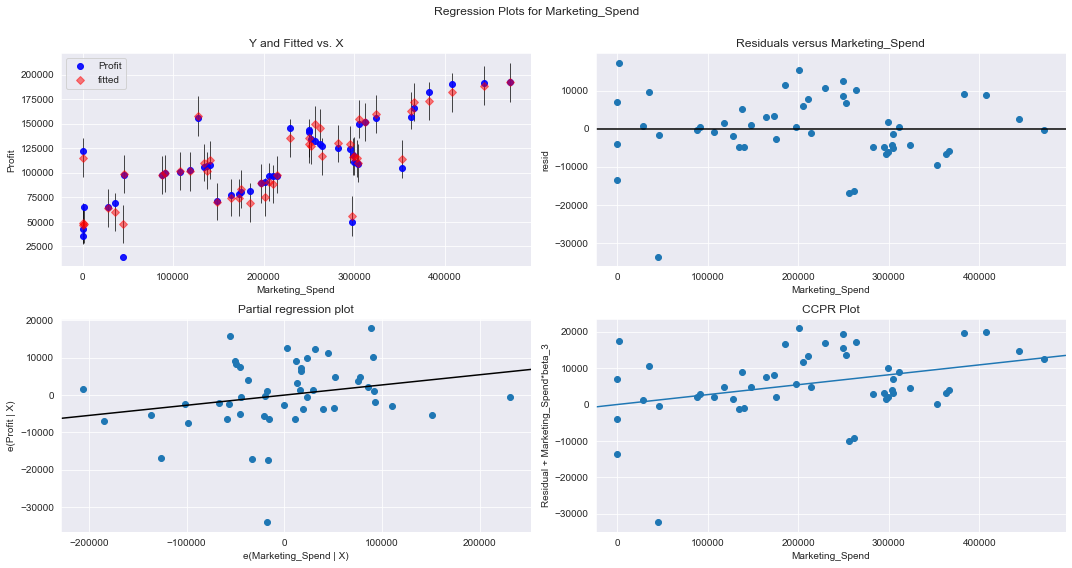

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

# Model Deletion Process

   # Detecting Influencers / Outlers

In [35]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance

In [36]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

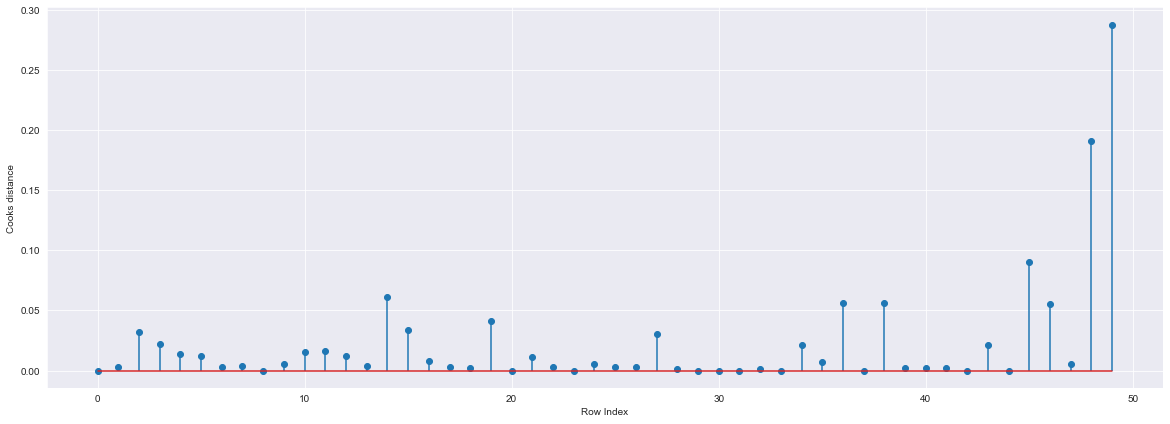

In [37]:
# Plot the influencers value using stem plot

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks distance')
plt.show()

In [38]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [39]:
k = data.shape[1]
n = data.shape[0]

In [40]:
k

5

In [41]:
n

50

In [43]:
threshold = 3*((k+1)/n)

In [44]:
threshold

0.36

# High Influence Point 

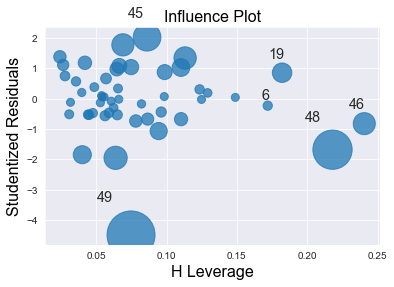

In [45]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [46]:
# from the plot
data[data.index.isin([49])]

,RandD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improve the model

In [49]:
data1 = data.drop(data.index[[49]],axis=0).reset_index()

In [50]:
data1= data1.drop(['index'],axis=1)

In [51]:
data1

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Again Building Final Model 

In [52]:
final_model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend', data= data1).fit()

In [53]:
final_model.rsquared, final_model.aic

(0.9613162435129847, 1020.5652974526367)

In [54]:
pred = pd.DataFrame()
pred['RandD_Spend']=data1.RandD_Spend
pred['Administration']= data1.Administration
pred['Marketing_Spend']=data1.Marketing_Spend
pred['Profit']=data1.Profit
pred['Pred_Profit'] = pd.DataFrame(final_model.predict(pred[['RandD_Spend','Administration','Marketing_Spend']]))
pred

,RandD_Spend,Administration,Marketing_Spend,Profit,Pred_Profit
0,165349.20,136897.80,471784.10,192261.83,190716.676999
1,162597.70,151377.59,443898.53,191792.06,187537.122227
2,153441.51,101145.55,407934.54,191050.39,180575.526396
3,144372.41,118671.85,383199.62,182901.99,172461.144642
4,142107.34,91391.77,366168.42,166187.94,170863.486721
5,131876.90,99814.71,362861.36,156991.12,162582.583177
6,134615.46,147198.87,127716.82,156122.51,157741.338633
7,130298.13,145530.06,323876.68,155752.60,159347.735318
8,120542.52,148718.95,311613.29,152211.77,151328.826941
9,123334.88,108679.17,304981.62,149759.96,154236.846778
